Multilayer Perceptron XOR Problem dengan Python

In [39]:
#table logika XOR 2 input

"""
x1  x2  y
1   1   0
1   0   1
0   1   1
0   0   0
"""

'\nx1  x2  y\n1   1   0\n1   0   1\n0   1   1\n0   0   0\n'

In [47]:
#machine learning

import keras
import numpy as np
import matplotlib.pyplot as plt

#model
model = keras.Sequential([
    #layer hidden
    keras.layers.Dense(units=4, input_shape=[2], activation=keras.activations.tanh),
    
    #layer outpupt
    keras.layers.Dense(units=1, input_shape=[4], activation=keras.activations.sigmoid),
])

#model compile
opt = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [49]:
class LossHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.losses = []
    self.accuracy = []

  def on_batch_end(self, batch, logs={}):
    self.losses.append(logs.get('loss'))
    self.accuracy.append(logs.get('binary_accuracy'))

In [50]:
#set data
xs = np.array([[1, 1], [1, 0], [0, 1], [0, 0]],dtype="uint16")
ys = np.array([0, 1, 1, 0],dtype="uint16")

In [51]:
#training
history = LossHistory()
model.fit(xs, ys, epochs=1000, callbacks=[history])

Epoch 1/1000
1/1 [==============================] - 1s 569ms/step - loss: 0.7198 - binary_accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7178 - binary_accuracy: 0.2500
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.7160 - binary_accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.7142 - binary_accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7125 - binary_accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.7110 - binary_accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7095 - binary_accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.7081 - binary_accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.7068 - binary_accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] -

In [44]:
model.predict_proba(xs).round()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

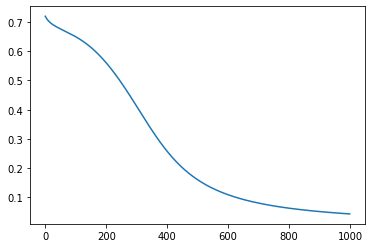

In [52]:
loss_values = history.losses

plot1 = plt.figure(1)
plt.plot(loss_values)
plt.show()

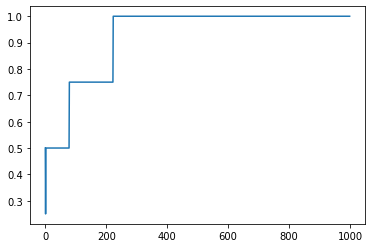

In [53]:
accuracy_values = history.accuracy

plot2 = plt.figure(2)
plt.plot(accuracy_values)
plt.show()